In [156]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange

cards = np.arange(52)

As = {0,1,2,3}
Ks = {4,5,6,7}
Qs = {8,9,10,11}
Js = {12,13,14,15}

face_cards = As.union(Ks,Qs,Js)

n_players = 4

players = np.arange(n_players)

game_length = []

for i in trange(100000):
    shuffle = np.random.choice(cards,size=52,replace=False)
    
    player_decks = {i:shuffle[i*52//n_players:(i+1)*52//n_players] for i in range(n_players)}
    
    stack = []
    tries = 0
    
    turns = []
    turn = 0
    
    card_counts = np.zeros((n_players,1000))

    slappers = np.arange(n_players)
    
    while np.sum([len(player_decks[p])==0 for p in range(n_players)])<(n_players-1):
        for player in players:
            card_counts[player,turn] = len(player_decks[player])
            if len(player_decks[player])==0:
                
                slappers = slappers[slappers!=player]
                
            if len(player_decks[player])>0:
                        
                
                card = player_decks[player][0]
                
                stack.append(card)
                player_decks[player] = player_decks[player][1:]
    
                if len(stack)>1:
    
                    if stack[-1]//n_players==stack[-2]//n_players:
                        slapper = np.random.choice(slappers)
    
                        player_decks[slapper] = np.hstack((player_decks[slapper],stack))
                        
                        stack = []
    
                if len(stack)>2:
    
                    if stack[-1]//n_players==stack[-3]//n_players:
                        slapper = np.random.choice(slappers)
    
                        player_decks[slapper] = np.hstack((player_decks[slapper],stack))
                        
                        stack = []
                        tries = 0
    
                if card not in face_cards:
                    while tries:
                        if len(player_decks[player])==0:
                            break
                        
                        card = player_decks[player][0]
                        stack.append(card)
                        player_decks[player] = player_decks[player][1:]
                        tries -= 1
    
                        if len(stack)>1:
    
                            if stack[-1]//n_players==stack[-2]//n_players:
                                slapper = np.random.choice(slappers)
            
                                player_decks[slapper] = np.hstack((player_decks[slapper],stack))
                                
                                stack = []
                                tries = 0
                                break
            
                        if len(stack)>2:
            
                            if stack[-1]//n_players==stack[-3]//n_players:
                                slapper = np.random.choice(slappers)
            
                                player_decks[slapper] = np.hstack((player_decks[slapper],stack))
                                
                                stack = []
                                tries = 0
                                break
    
                        
                        if card in face_cards:
                            break
    
                        player_decks[face_card_player] = np.hstack((player_decks[face_card_player],stack))
                        stack = []
    
                
    
                if card in face_cards:
                    face_card_player = player
                    if card in As:
                        tries = 4
    
                    if card in Ks:
                        tries = 3
    
                    if card in Qs:
                        tries = 2
    
                    if card in Js:
                        tries = 1
    
                if card not in face_cards:
                    tries = 0
    
            if player==(n_players-1):
                turn += 1
                turns += [turn]

    for player in players:
        card_counts[player,turn] = len(player_decks[player])
    turn += 1
    turns += [turn]
    game_length += [turn]
    
                
            


  0%|          | 0/100000 [00:00<?, ?it/s]

In [157]:
player_decks

{0: array([42, 37, 22, 40, 49, 12, 17,  8, 30, 14, 35,  7,  5, 51, 20, 27, 28,
         0, 48,  3, 10, 19, 33, 50, 31, 39, 46, 43, 32, 36,  4, 38, 41, 13,
         1, 25, 47,  9, 18, 45, 16, 15, 23, 24, 21, 44, 11, 34,  6,  2, 29,
        26]),
 1: array([], dtype=int64),
 2: array([], dtype=int64),
 3: array([], dtype=int64)}

52.0


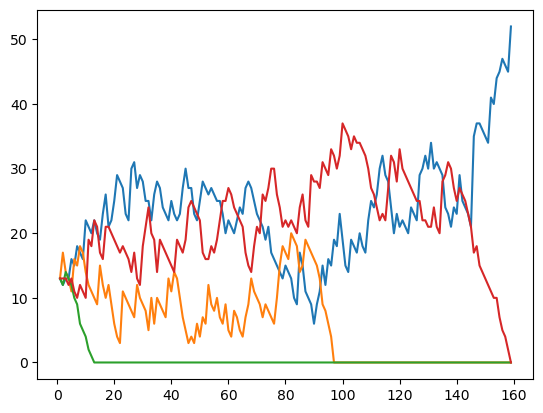

In [158]:
print(np.max(card_counts))
plt.figure()
for i in range(n_players):
    plt.plot(turns,card_counts[i,:len(turns)])
    
plt.show()

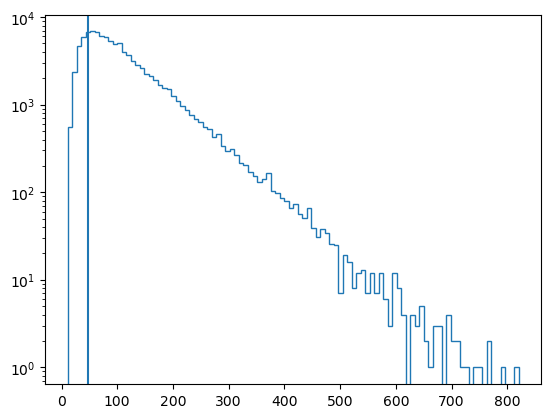

In [168]:
plt.figure()
plt.hist(game_length,histtype='step',bins=100)
plt.axvline(48)
plt.yscale('log')
plt.show()

In [167]:
val,num = np.unique(game_length,return_counts=True)
val[np.argmax(num)]

48

In [166]:
num

array([  3,  10,  22,  30,  53,  78,  73, 118, 168, 163, 215, 240, 244,
       320, 340, 405, 443, 466, 531, 584, 550, 571, 609, 660, 713, 717,
       673, 715, 757, 735, 776, 775, 810, 813, 829, 841, 815, 930, 805,
       852, 898, 830, 854, 831, 913, 802, 890, 882, 838, 847, 829, 839,
       843, 796, 860, 799, 862, 779, 746, 786, 757, 785, 726, 719, 784,
       748, 787, 666, 772, 751, 709, 745, 676, 676, 677, 656, 685, 656,
       694, 617, 611, 652, 645, 624, 602, 569, 620, 613, 564, 588, 569,
       588, 550, 567, 540, 525, 529, 541, 540, 494, 487, 509, 541, 470,
       468, 493, 458, 504, 460, 437, 432, 457, 468, 452, 402, 413, 408,
       398, 404, 382, 378, 390, 371, 336, 372, 367, 362, 335, 355, 364,
       318, 345, 329, 348, 343, 325, 314, 277, 317, 286, 298, 287, 263,
       261, 277, 257, 293, 274, 277, 253, 261, 263, 241, 276, 257, 234,
       255, 251, 239, 254, 222, 216, 203, 220, 238, 225, 200, 189, 211,
       186, 206, 182, 197, 185, 206, 176, 195, 182, 201, 169, 17